Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## 1. Загрузка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загружаем данные
data = pd.read_csv('/datasets/insurance.csv')
# изучаем
display(data, data.info(), data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


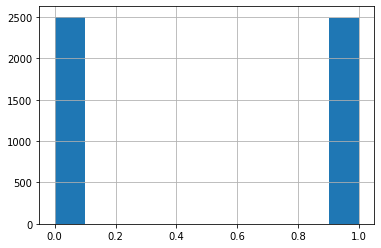

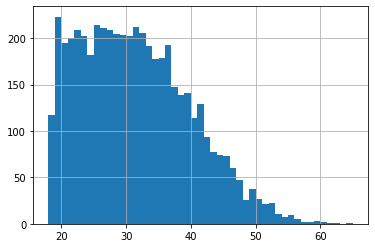

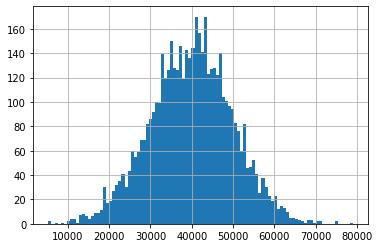

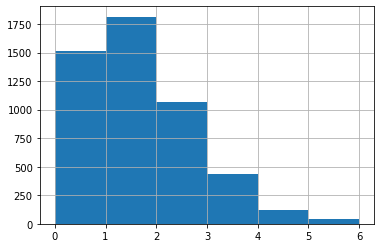

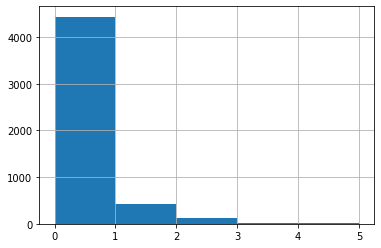

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

In [3]:
data['Пол'].hist(bins=10)
plt.show()
data['Возраст'].hist(bins=47)
plt.show()
data['Зарплата'].hist(bins=100)
plt.show()
data['Члены семьи'].hist(bins=6)
plt.show()
data['Страховые выплаты'].hist(bins=5)
plt.show()
display(data['Страховые выплаты'].value_counts())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


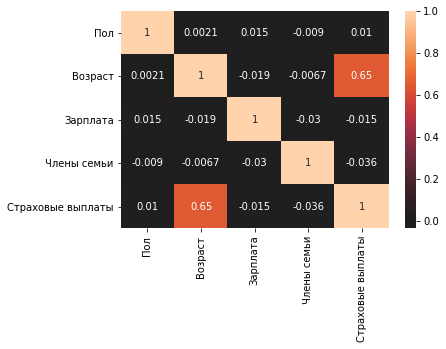

In [4]:
display(data.corr())
# смотрим корреляцию методом seaborn.heatmap()
ax = sns.heatmap(data.corr(), center=0, annot=True)

Перед нами - массив данных о клиентах страховой компании, в котором содержится информация о поле, возрасте, доходе, семейном положениии клиента и о факте его обращения за страховой выплатой.

Пропуски. Данная таблица не содержит пропусков, равно как и сильно выбивающихся значений.

Распределение величин по зарплате нормальное, по остальным параметрам - также укладывающееся в логические условия (мужчин и женщин поровну, возраст большинства - от 20 до 50, количество детей у большинства меньше 3 и 90% людей не обращались за страховыми выплатами).

Корреляция между признаками выявилась только одна - между возрастом и количеством обращений за страховыми выплатами. Что и понятно - чем дольше человек живет, тем выше вероятность что у него произойдет какой-либо страховой случай.

Наша задача - защитить данные клиентов, то есть привести параметры к такому виду, чтобы их нельзя было привязать к какому либо человеку. Но сделать это надо таким образом, чтобы не ухудшилось качество модели.

## 2. Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

In [5]:
# разбиваем данные на признаки и целевой признак, сразу их векторизуем
X = data.drop('Страховые выплаты', axis=1).values
y = data['Страховые выплаты'].values
print(X.shape, y.shape)

# разбиваем выборки на тестовые и обучающие
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5000, 4) (5000,)
(4000, 4) (1000, 4) (4000,) (1000,)


Данные разбиты на обучающую и тестовую выборки

In [6]:
# Обучение линейной регрессии и предсказание по ней будут выглядеть так:

w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @y_train
a = X_test @ w

MSE = ((a - y_test)**2).mean()
print(MSE)

0.15492698373547012


In [8]:
# создаем обратимую матрицу, на которую будем умножать признаки

M = np.random.randint(0, 20, size = (4, 4))

# проверяем обратимость матрицы

I = np.linalg.inv(M) # если матрица необратима, программа выдаст ошибку
print(M, I) 

[[19 10  4  3]
 [14  9  7 18]
 [ 0  4  4 12]
 [ 3 15  9  4]] [[-0.04347826  0.13043478 -0.18478261  0.        ]
 [ 0.48602484 -0.63664596  0.86917702 -0.10714286]
 [-0.84937888  1.08385093 -1.52057453  0.32142857]
 [ 0.12111801 -0.14906832  0.30046584 -0.07142857]]


In [18]:
# умножаем признаки на обратимую матрицу

X_train_after = np.dot(X_train, M)
X_test_after = np.dot(X_test, M) 
display(X_train_after, X_test_after)
display(X_train_after.shape, X_test_after.shape)

array([[6.47000e+02, 1.56029e+05, 1.55931e+05, 4.67632e+05],
       [6.97000e+02, 5.56720e+04, 5.55580e+04, 1.66475e+05],
       [5.26000e+02, 1.34749e+05, 1.34665e+05, 4.03855e+05],
       ...,
       [3.67000e+02, 1.41849e+05, 1.41791e+05, 4.25272e+05],
       [4.23000e+02, 9.94850e+04, 9.94190e+04, 2.98144e+05],
       [4.70000e+02, 1.11913e+05, 1.11837e+05, 3.35383e+05]])

array([[4.25000e+02, 1.57471e+05, 1.57407e+05, 4.72125e+05],
       [4.70000e+02, 1.51513e+05, 1.51437e+05, 4.54183e+05],
       [6.05000e+02, 2.16439e+05, 2.16327e+05, 6.48757e+05],
       ...,
       [4.62000e+02, 1.45497e+05, 1.45431e+05, 4.36194e+05],
       [5.54000e+02, 7.39670e+04, 7.38790e+04, 2.21491e+05],
       [3.81000e+02, 1.48658e+05, 1.48598e+05, 4.45690e+05]])

(4000, 4)

(1000, 4)

Как мы видим, признаки зашифрованы - связать информацию с определенным клиентом стало сложнее.

In [10]:
# Заново обучим линейную регрессию на преобразованной матрице и построим вектор предскзаний w_after

w_after = np.linalg.inv(X_train_after.T@X_train_after)@X_train_after.T@y_train
a_after = X_test_after@w_after

# сравним качество регрессии

MSE_after = ((a_after - y_test)**2).mean()
print('Разность между MSE и MSE_after: ', MSE_after - MSE)

Разность между MSE и MSE_after:  -1.0480773027232715e-08


**Ответ:** Как мы видим, качество линейной регрессии не изменилось. Этот факт эмпирический - обоснуем его математически.

**Обоснование:** 

Посмотрим, как влияет домножение матрицы признаков X на матрицу M, имеющую обратную марицу:

$$
w2 = ((XM)^TXM)^{-1}(XM)^Ty
$$

Раскроем скобки и сгруппируем матрицы в новом порядке:

$$
w2 = (X^TM^TXM)^{-1}X^TM^Ty
$$

$$
w2 = (M^TM)^{-1}M^T(X^TX)^{-1}X^Ty
$$

В правой части получилась формула получения исходного вектора параметров w, произведем замену:

$$
w2 = (M^TM)^{-1}M^Tw
$$

$$
w2 = (M^T)^{-1}M^{-1}M^Tw
$$
Поскольку матрица M обратима, произведение транспонированной матрицы на обратную ей дает единичиную матрицу Е:

$$
w2 = M^{-1}w
$$

Тогда новый вектор предсказаний будет иметь вид:
$$
a2 = XMM^{-1}w = Xw 
$$

То есть новый вектор предсказаний будет равен исходному. Что и требовалось доказать.

## 3. Алгоритм преобразования

**Алгоритм**
Воспользуемся проверенным выше алгоритмом: домножим исходную матрицу признаков Х на обратимую матрицу M, преобразуя данные клиентов в форму, "прочитать" которую можно будет лишь с помощью ключа - исходной матрицы шифрования M.

Шифрование клиентских данных: 
$$
X2 = XM
$$

Обратное преобразование:
$$
X = X2M^{-1}
$$

**Обоснование**

Математическое обоснование целесообразности применения вышеописанного алгоритма уже было приведено во втором пункте данного проекта.

## 4. Проверка алгоритма

In [13]:
# строим модель по исходным данным, измеряем R2

model = LinearRegression().fit(X_train, y_train)
predict = model.predict(X_test)
r2 = r2_score(y_test, predict)
print(r2)

0.4326945640384887


In [22]:
# строим модель по зашифрованным данным, измеряем R2

model_after = LinearRegression().fit(X_train_after, y_train)
predict_after = model_after.predict(X_test_after)
r2_after = r2_score(y_test, predict_after)
print(r2_after)

# смотрим разность метрик
print("Разность метрик равна", r2 - r2_after)

0.43269456403844064
Разность метрик равна 4.807265696626928e-14


Разность метрик близка к нулю - наш алгоритм работоспособен

In [20]:
# проверяем обратное преобразование матриц

print(X_train_after @ (np.linalg.inv(M)))

[[3.01869640e-12 4.60000000e+01 3.89000000e+04 1.00000000e+00]
 [1.00000000e+00 4.80000000e+01 1.38000000e+04 2.00000000e+00]
 [1.00000000e+00 3.60000000e+01 3.36000000e+04 1.00000000e+00]
 ...
 [1.47605261e-11 2.60000000e+01 3.54000000e+04 1.00000000e+00]
 [6.19104767e-12 3.00000000e+01 2.48000000e+04 1.00000000e+00]
 [1.00000000e+00 3.20000000e+01 2.79000000e+04 1.00000000e+00]]


Значения после обратного преобразования также приняли изначалаьную форму

### Вывод

Были загружены и изучены данные клиентов страховой компании "Хоть потоп". Было проверено, меняет ли домножение матрицы признаков на случайную обратимую на качество линейной регрессии. Предсказание, как и обучение, было проведено с помощью только библиотеки numpy.
    
Во второй части работы мы провели теоретическое обоснование полученным результатам.

В третьей части был изложен алгоритм преобразования признаков обратимой матрицей, а так же процесс дешифровки - обратного преобразования признаков.
    
В последней части с помощью библиотеки sklearn мы обучили модель линейной регрессии на изначальных и преобразованных признаках, убедились на примере метрики R2, что качество моделей не изменилось после шифрования, а также проверили обратное преобразование данных. Наш алгоритм работает)

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования